#  Question 3 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt

# use LaTeX, set global settings for plots 
plt.rc('font', family='serif')
plt.rc('legend', frameon=True)
plt.rc('text', usetex=True)
plt.rc('legend', numpoints=1)

In this question we will compare the mean value method and importance sampling for Monte Carlo integration on the following integral:

\begin{equation}
I = \int _ { 0 } ^ { 1 } \frac { x ^ { - 1 / 2 } } { 1 + \mathrm { e } ^ { x } } \mathrm { d } x
\end{equation}

# Mean Value Monte-Carlo Integration

We begin with the mean value method, which uses calculates the integral $I$ using:

\begin{equation}
I \approx \frac{b-a}{N} \sum _ { i=1 } ^ { N } f(x_i) = \frac{b-a}{N} \sum _ { i=1 } ^ { N } \frac { x_i ^ { - 1 / 2 } } { 1 + \mathrm { e } ^ { x_i } }
\end{equation}

for $N$ randomly chosen points $\{ x_i \} \in [0,1]$. For this example we take $N=10,000$ and repeat the calculation 100 times, plotting a histogram of the result.

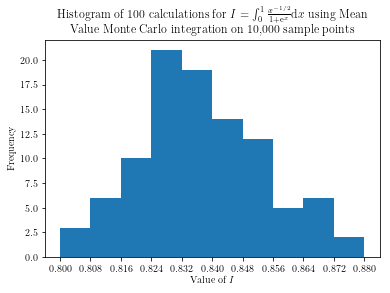

In [2]:
# Define Constants
N=10000      # number of sample points
calcs=100    # number of caluclations to do
a=0          # lower integration bound
b=1          # upper integration bound

def f(x):
    ''' Integrand function f(x)'''
    return 1./(np.sqrt(x)*(1.+np.exp(x)))

# create array to store N random values for calcs calculations
# we rescale the array to a to b (in this case it does nothing)
x = np.random.rand(calcs,N) * (b-a) + a
# calculate the integral I using above formula
I_1 = (b-a)/N*np.sum(f(x),axis=1)
# plot the results in a histogram of 10 bins from 0.8 to 0.88
n,bins,patches = plt.hist(I_1, bins=10, range=[0.8, 0.88])
plt.title(r'\begin{center} Histogram of 100 calculations for $I=\int_{0}^{1} \
            \frac{x^{-1/2}}{1+ \mathrm{e}^{x}} \mathrm{d}x$ using Mean \\ \
            Value Monte Carlo integration on 10,000 sample points \end{center}')
plt.ylabel('Frequency')
plt.xlabel(r'Value of $I$')
plt.xticks(bins)
plt.show()

The result is somewhat of a gaussian distribution with an average value around 0.84 for the integral. How does this compare to other results?

# Importance Sampling Monte-Carlo Integration

We will now compute the same integral using importance sampling, given by

\begin{equation}
I \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{w(x_i)} \int_a^b w(x)\mathrm{d}x = \frac{1}{N} \sum_{i=1}^{N} \frac{1}{1+\mathrm{e}^{x_i}} \int_a^b x^{-1/2}\mathrm{d}x = \frac{2}{N} \sum_{i=1}^{N} \frac{1}{1+\mathrm{e}^{x_i}},
\end{equation}

where we have used $w(x) = x^{-1/2}$ and $f(x) = \frac{x^{-1/2}}{1+\mathrm{e}^{x}}$. In our case we have made the further simplification by noting that

\begin{equation*}
\int_a^b w(x)\mathrm{d}x = \int_0^1 x^{-1/2}\mathrm{d}x = 2x^{1/2} \Big{|} _0 ^1 = 2.
\end{equation*}

We must also be careful to make sure that our samples are chosen with the correct distribution. We are no longer chosing uniformly distributed random samples, but instead picking our points wisely according to the distribution

\begin{equation}
p(x) = \frac{w(x)}{\int_a^b w(x)\mathrm{d}x} = \frac{1}{2\sqrt{x}}
\end{equation}

Therefore, starting with a uniform distribution of $z$ values, we must employ a transformation $x(z)$ that satisfies:
\begin{align*}
z &= \int_{- \infty}^{x(z)}p(x')\mathrm{d}x = \int_{0}^{x(z)}\frac{\mathrm{d}x}{2\sqrt{x'}} \\
&= \sqrt{x} \\
\Rightarrow z^2 &= x
\end{align*}

In summary, and switching back from $z$ to $x$ to confuse the reader (muahaha), if we start with a selection of $N$ randomly selected, uniformly distributed points $\{ x_i \} \in [0,1]$ then our integral $I$ can be calculated using the formula

\begin{equation}
I \approx \frac{2}{N} \sum_{i=1}^{N} \frac{1}{1+\mathrm{e}^{(x_i)^2}}.
\end{equation}

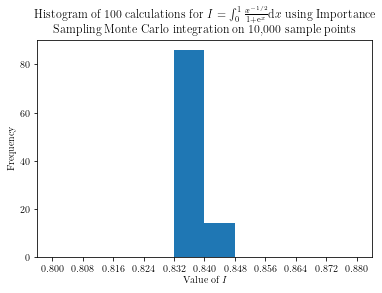

In [3]:
def g(x):
    ''' function f(z(x))/w(z(x)) to sum over'''
    return 1./(1.+np.exp(x**2))

# use same x array to store N random values for calcs calculations
#x = np.random.rand(calcs,N) * (b-a) + a
# calculate the integral I using above formula
I_2 = 2./N*np.sum(g(x),axis=1)
# plot the results in a histogram of 10 bins from 0.8 to 0.88
n,bins,patches = plt.hist(I_2, bins=10, range=[0.8, 0.88])
plt.title(r'\begin{center} Histogram of 100 calculations for $I=\int_{0}^{1} \
            \frac{x^{-1/2}}{1+ \mathrm{e}^{x}} \mathrm{d}x$ using Importance \\ \
            Sampling Monte Carlo integration on 10,000 sample points \end{center}')
plt.ylabel('Frequency')
plt.xlabel(r'Value of $I$')
plt.xticks(bins)
plt.show()

The result is quite definitive. We used the exact same randomly ${x_i}$, yet the importance sampling gave a much tighter distribution of integral values (smaller standard deviation). We can me more confident in our final value. In other words, the error on the importance sampling measurement is much lower than that of the mean value method. This makes sense if you consider how the methods differ. Importance sampling wastes minimal time testing values where the function is small. Instead it concentrates in areas where the function is large, and thus computes the integral more efficiently. (If we choose a proper $w(x)$)

# Part 2 - Rapidly Varying Integrands

The above worked great. But what if we want to investigate the same with the following integral?

\begin{equation}
\int _ { 0 } ^ { 10 } \mathrm { e } ^ { - 2 | x - 5 | } d x
\end{equation}

Mean Value Monte Carlo Integration will be as straight forward as plugging in the new integrand into the formula from the first section, namely

\begin{equation}
I \approx \frac{b-a}{N} \sum _ { i=1 } ^ { N } f(x_i) = \frac{10}{N} \sum_{i=1}^{N} \mathrm{e}^{-2 | x_i - 5 | }
\end{equation}

where we again take $N$ randomly and uniformly chosen points $\{ x_i \} \in [0,1]$. For this example we take $N=10,000$ and repeat the calculation 100 times, plotting a histogram of the result using 10 bins from the minimum to the maximum calculated value.

The importance sampling once more requires more thought, but thankfully to make matters easy $w(x)$ and $p(x)$ are already given to us in the question as

\begin{equation*}
w ( x ) = p(x) = \frac { 1 } { \sqrt { 2 \pi } } e ^ { - ( x - 5 ) ^ { 2 } / 2 },
\end{equation*}

which is a simple gaussian with standard deviation 1 and mean of 5. That means to make our lives simple we can just take our gaussian-sampled points directly from the function $\texttt{np.random.normal}$ rather than worrying about transforming uniformly distributed points $\{ z_i \}$ first. The final expression is thus

\begin{equation}
I \approx \frac{1}{N} \sum_{i=1}^{N} \frac{f(x_i)}{w(x_i)} \int_a^b w(x)\mathrm{d}x = \frac{\sqrt { 2 \pi }}{N} \sum_{i=1}^{N} e ^ {( x_i - 5 ) ^ { 2 }/{2} - 2 | x_i - 5 |}
\end{equation}

where $\{ x_i \}$ are gaussian distributed with standard deviation 1 and mean of 5.

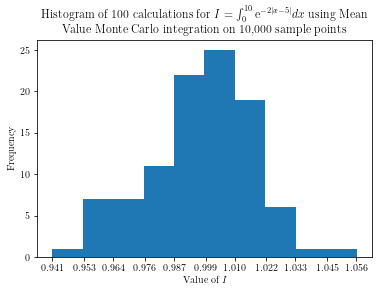

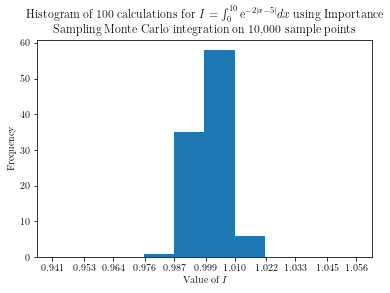

In [5]:
# Define Constants
N=10000      # number of sample points
calcs=100    # number of caluclations to do
a=0          # lower integration bound
b=10          # upper integration bound

###### Mean Value Integration #####
def f(x):
    ''' Integrand function f(x)'''
    return np.exp(-2*np.abs(x-5))

# create array to store N random values for calcs calculations
# we rescale the array to a to b (in this case stretches from 1 to 10)
x = np.random.rand(calcs,N) * (b-a) + a
# calculate the integral I using above formula
I_1 = (b-a)/N*np.sum(f(x),axis=1)
# plot the results in a histogram of 10 bins from 0.8 to 0.88
n,bins,patches = plt.hist(I_1, bins=10, range=[min(I_1), max(I_1)])
bins = [round(i,3) for i in bins] # round bin values for plotting
plt.title(r'\begin{center} Histogram of 100 calculations for $I=\int_{0}^{10} \
            \mathrm{e}^{-2 | x-5 |}dx$ using Mean \\ Value Monte Carlo \
            integration on 10,000 sample points \end{center}')
plt.ylabel('Frequency')
plt.xlabel(r'Value of $I$')
plt.xticks(bins)
plt.show()

##### Importance Sampling #####
def g(x):
    ''' function f(z(x))/w(z(x)) to sum over'''
    return np.exp((x-5)**2/2.-2*np.abs(x-5))

# create gaussian array to store N random values for calcs calculations
z = np.random.normal(5,1,(calcs,N))
# calculate the integral I using above formula
I_2 = (2.*np.pi)**0.5/N*np.sum(g(z),axis=1)
# plot the results in a histogram of 10 bins from 0.8 to 0.88
plt.hist(I_2, bins=10, range=[min(I_1), max(I_1)])
plt.title(r'\begin{center} Histogram of 100 calculations for $I=\int_{0}^{10} \
            \mathrm{e}^{-2 | x-5 |}dx$ using Importance \\ Sampling Monte \
            Carlo integration on 10,000 sample points \end{center}')
plt.ylabel('Frequency')
plt.xlabel(r'Value of $I$')
plt.xticks(bins)
plt.show()

We find results very similar to that of Part A, namely that the importance sampling results in a calculation with smaller error, i.e. smaller standard deviation from the true result, giving a more narrow histogram. Once again this can be attributed to the Importance Sampling spending more time picking points in the 'tricky' areas of the integral. It is important to note however that the success of this experiment is thanks to the fact that we chose a suitable $w(x)$, which was given to us in the question.